In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Carregar o dataset

df = pd.read_csv('teste_indicium_precificacao.csv')
df.head()


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
# Remover colunas irrelevantes
df = df.drop(['id', 'host_id', 'nome', 'host_name', 'ultima_review'], axis=1)

latitude                            Axes(0.125,0.712609;0.168478x0.167391)
longitude                        Axes(0.327174,0.712609;0.168478x0.167391)
price                            Axes(0.529348,0.712609;0.168478x0.167391)
minimo_noites                    Axes(0.731522,0.712609;0.168478x0.167391)
numero_de_reviews                   Axes(0.125,0.511739;0.168478x0.167391)
reviews_por_mes                  Axes(0.327174,0.511739;0.168478x0.167391)
calculado_host_listings_count    Axes(0.529348,0.511739;0.168478x0.167391)
disponibilidade_365              Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

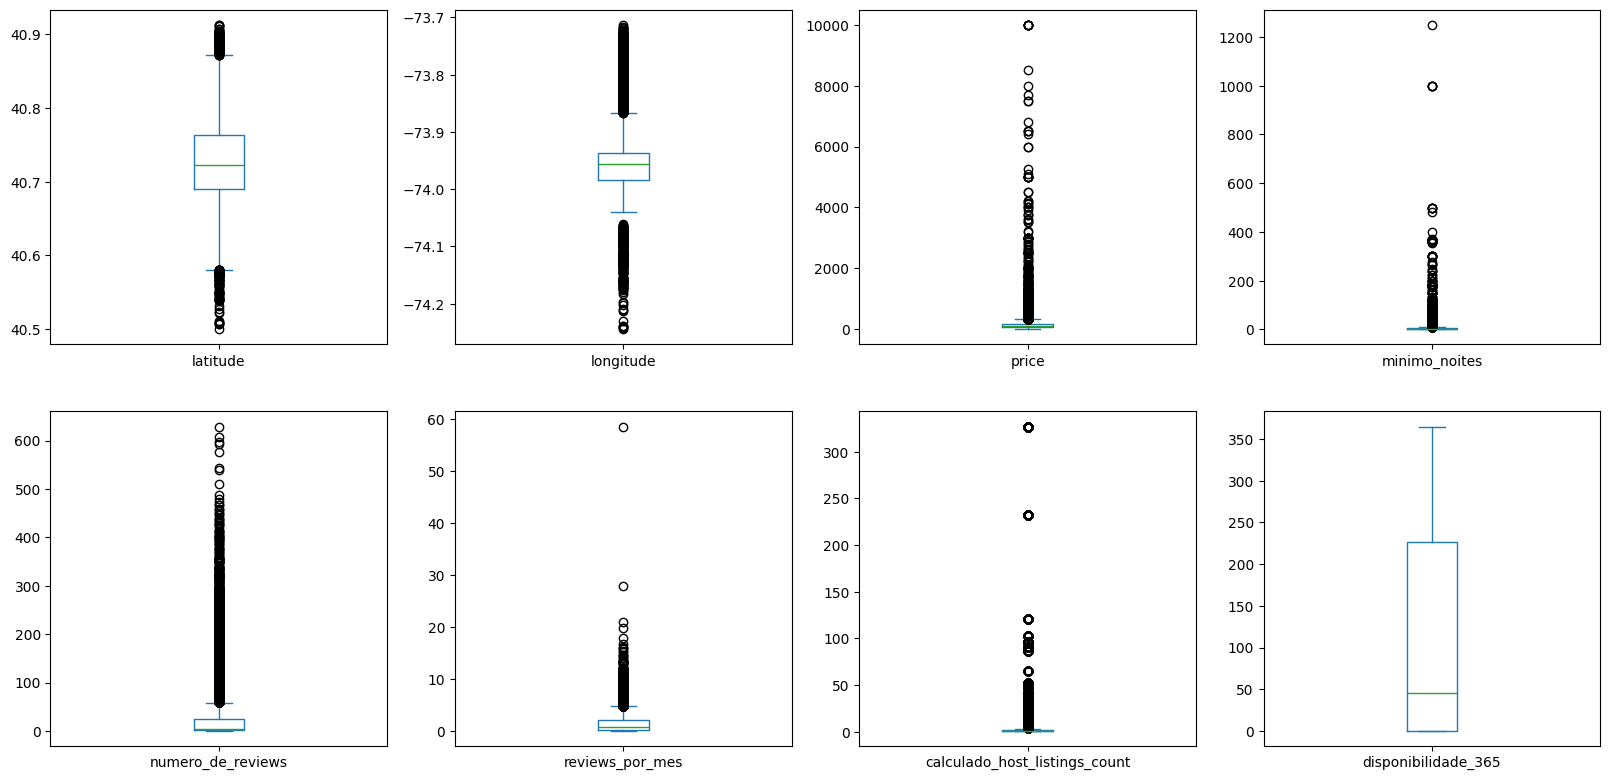

In [4]:
#plotar gráficos para analisar a distribuição dos dados
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))

Iremos tratar o dataset limpando os outliers de algumas variáveis como preço, numero de reviews, minimo noites, reviews por mes e calculado host listings counts. Não iremos excluir dados de longitude e latitude pois isso faria que tivessemos um dataset somente com casas próximas ao centro da cidade

In [5]:
#filtrando o dataframe para remover outliers
df_filtrado = df.drop(df[df['price'] > 350].index)
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['numero_de_reviews'] > 50].index)
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['minimo_noites'] > 50].index)
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['reviews_por_mes'] > 2.5].index)
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['calculado_host_listings_count'] > 5].index)
df_filtrado = df_filtrado.drop(df_filtrado[df_filtrado['disponibilidade_365']== 0].index)


latitude                            Axes(0.125,0.712609;0.168478x0.167391)
longitude                        Axes(0.327174,0.712609;0.168478x0.167391)
price                            Axes(0.529348,0.712609;0.168478x0.167391)
minimo_noites                    Axes(0.731522,0.712609;0.168478x0.167391)
numero_de_reviews                   Axes(0.125,0.511739;0.168478x0.167391)
reviews_por_mes                  Axes(0.327174,0.511739;0.168478x0.167391)
calculado_host_listings_count    Axes(0.529348,0.511739;0.168478x0.167391)
disponibilidade_365              Axes(0.731522,0.511739;0.168478x0.167391)
dtype: object

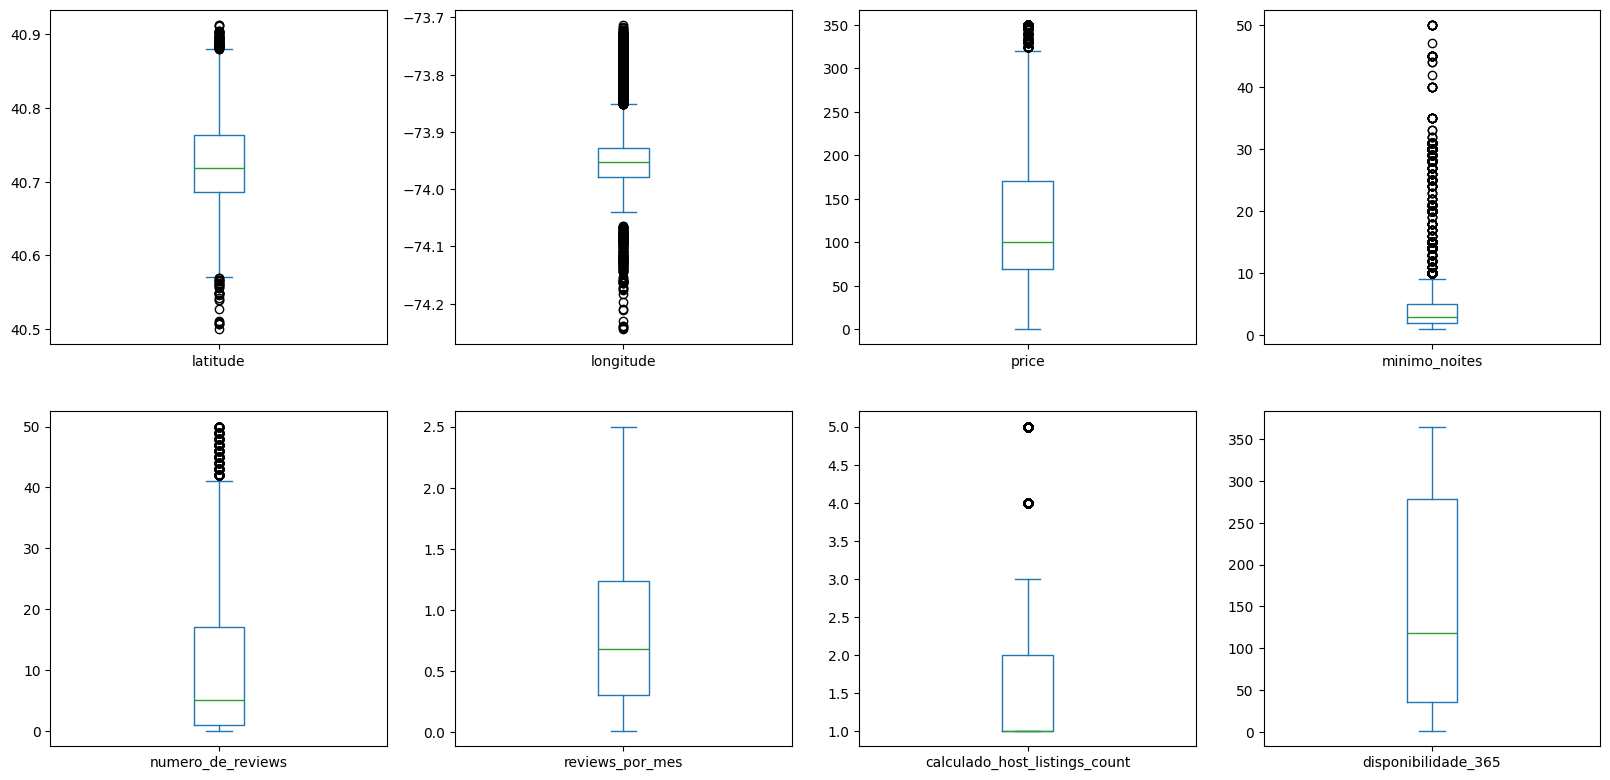

In [6]:
df_filtrado.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))

In [7]:
# Definir colunas categóricas e numéricas
categorical_cols = ['room_type', 'bairro_group', 'bairro']
numerical_cols = [col for col in df_filtrado.select_dtypes(include=['int64', 'float64']).columns if col != 'price']



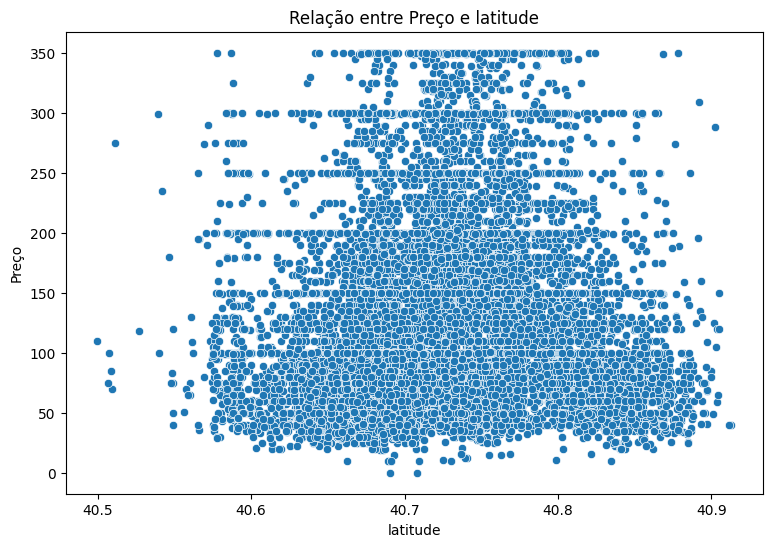

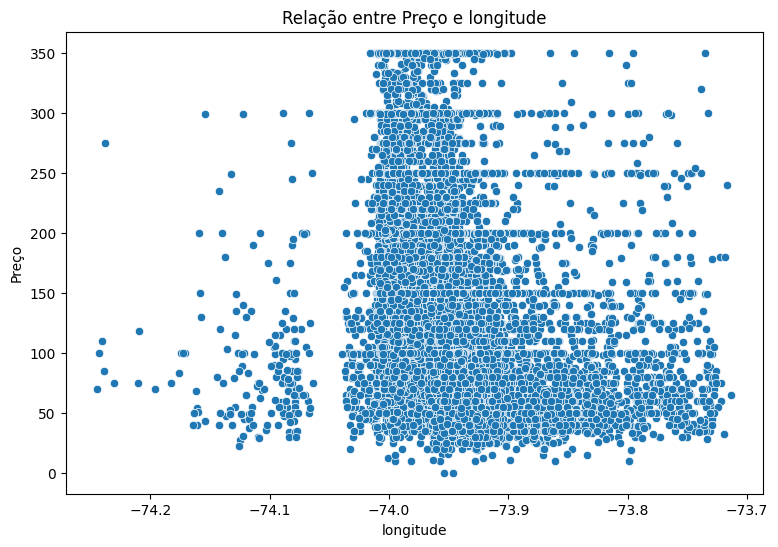

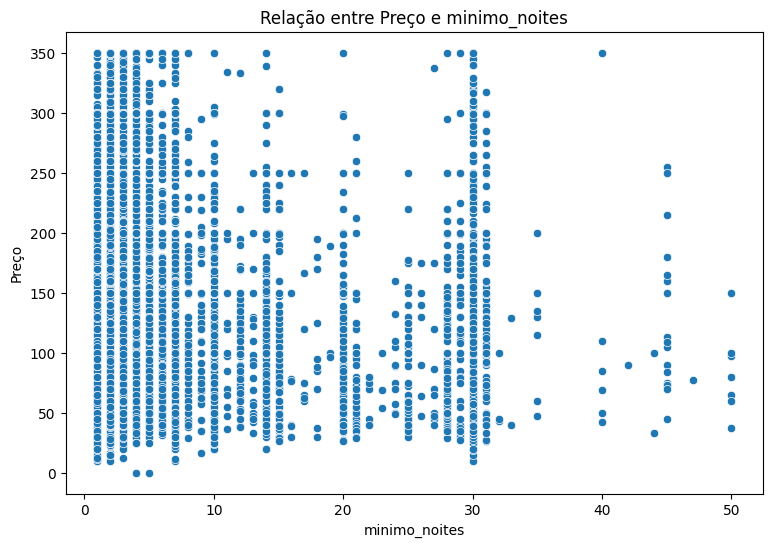

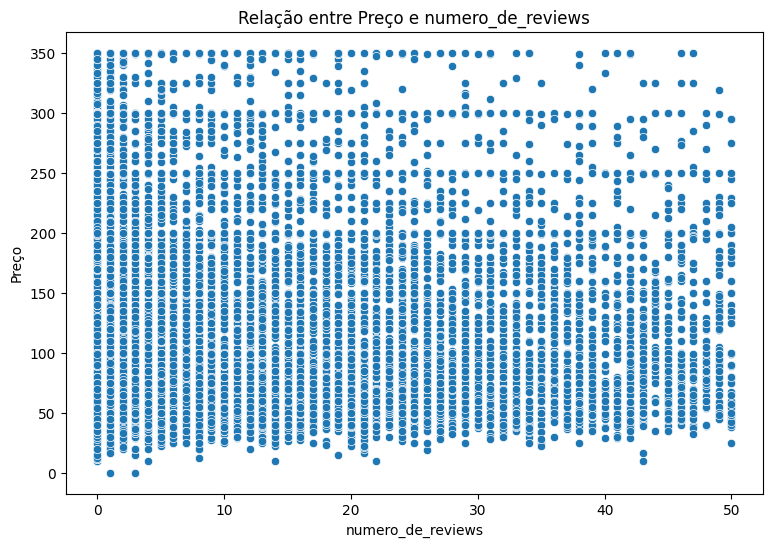

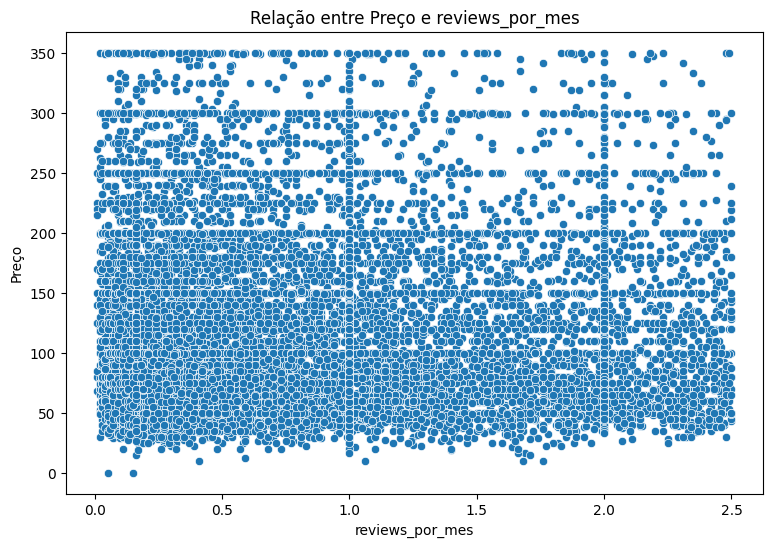

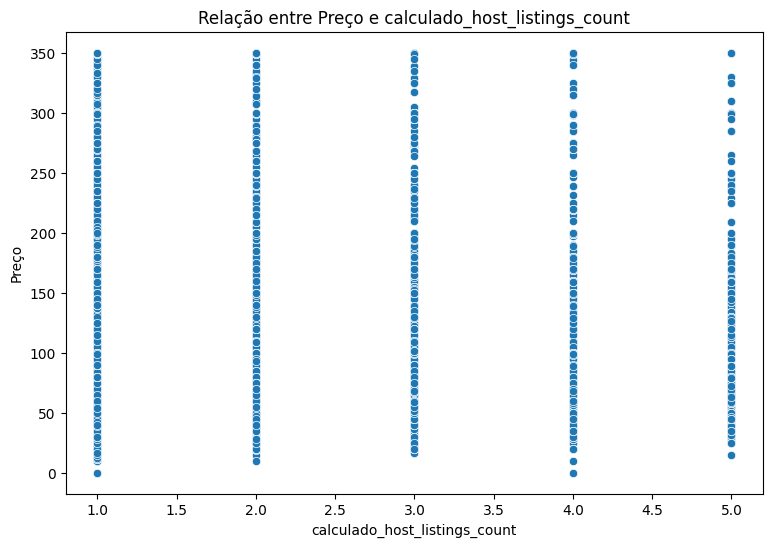

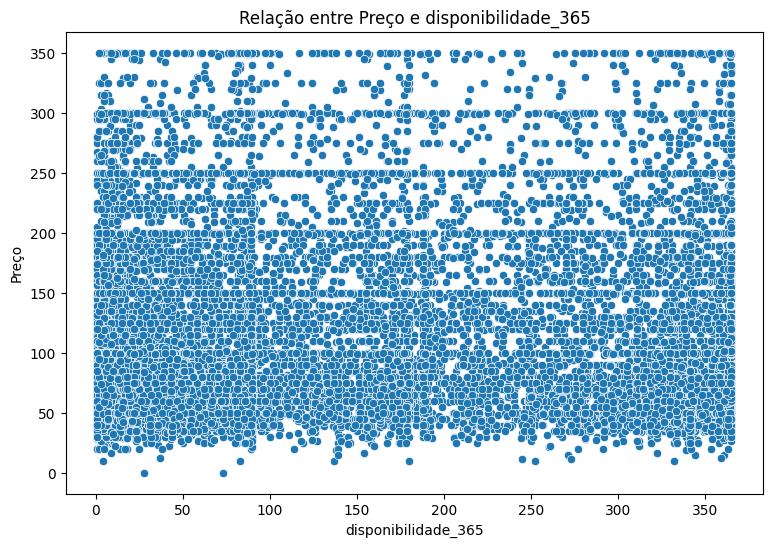

In [8]:
for col in numerical_cols:
    plt.figure(figsize=(9, 6))
   
    sns.scatterplot(x=df_filtrado[col], y=df_filtrado['price'])
    plt.xlabel(col)
    plt.ylabel("Preço")
    plt.title(f"Relação entre Preço e {col}")
    plt.show()

O motivo de não ter casas na latitude -70.5 se deve ao fato de ser localizado num arquipélago de nova iorque. 
Vemos que os dados de longitude vão de aproximadamente -74.2 até -73.7 e o de latitude vão de 40.5 até 40.9 pois são os limites da cidade. E portanto, podemos ver que as casas de maiores preços estarão mais próximas ao centro da cidade.


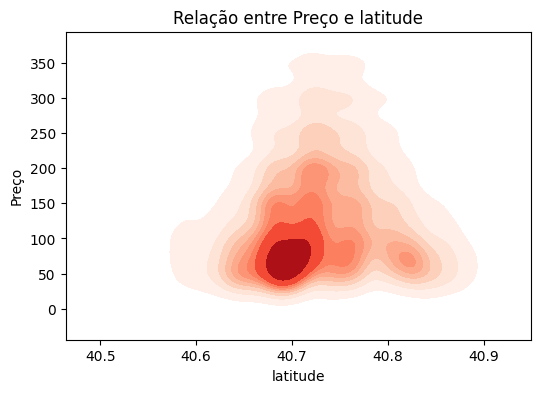

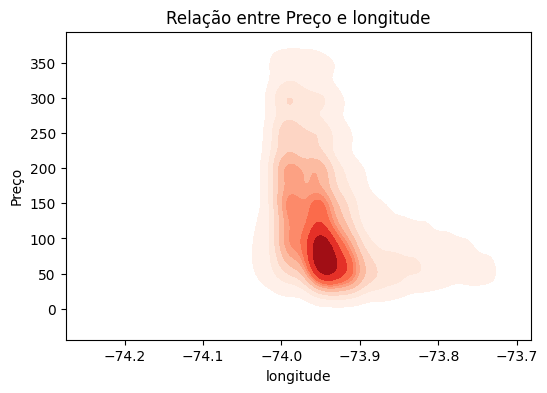

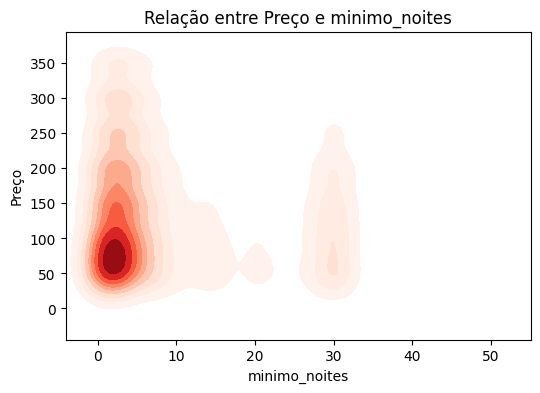

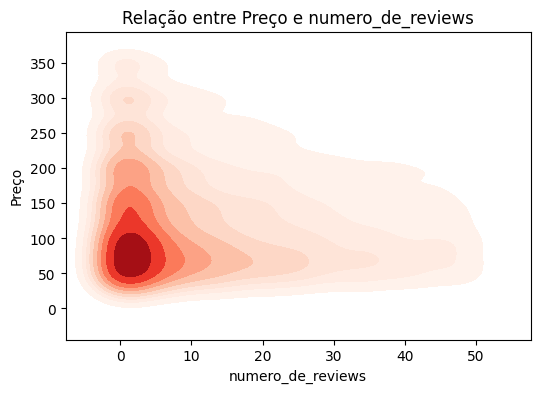

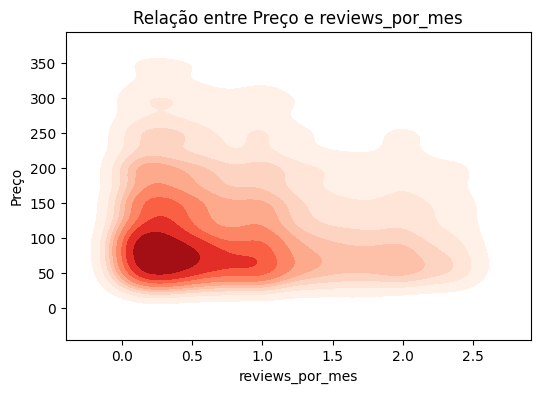

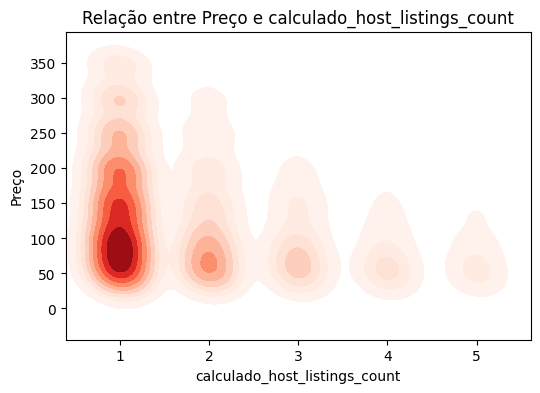

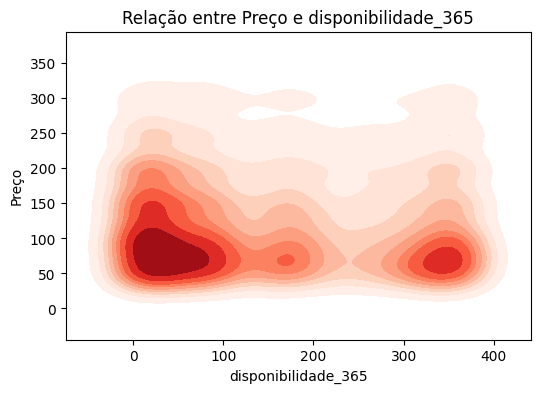

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(x=df_filtrado[col], y=df_filtrado['price'], cmap="Reds", fill=True)
    plt.xlabel(col)
    plt.ylabel("Preço")
    plt.title(f"Relação entre Preço e {col}")
    plt.show()

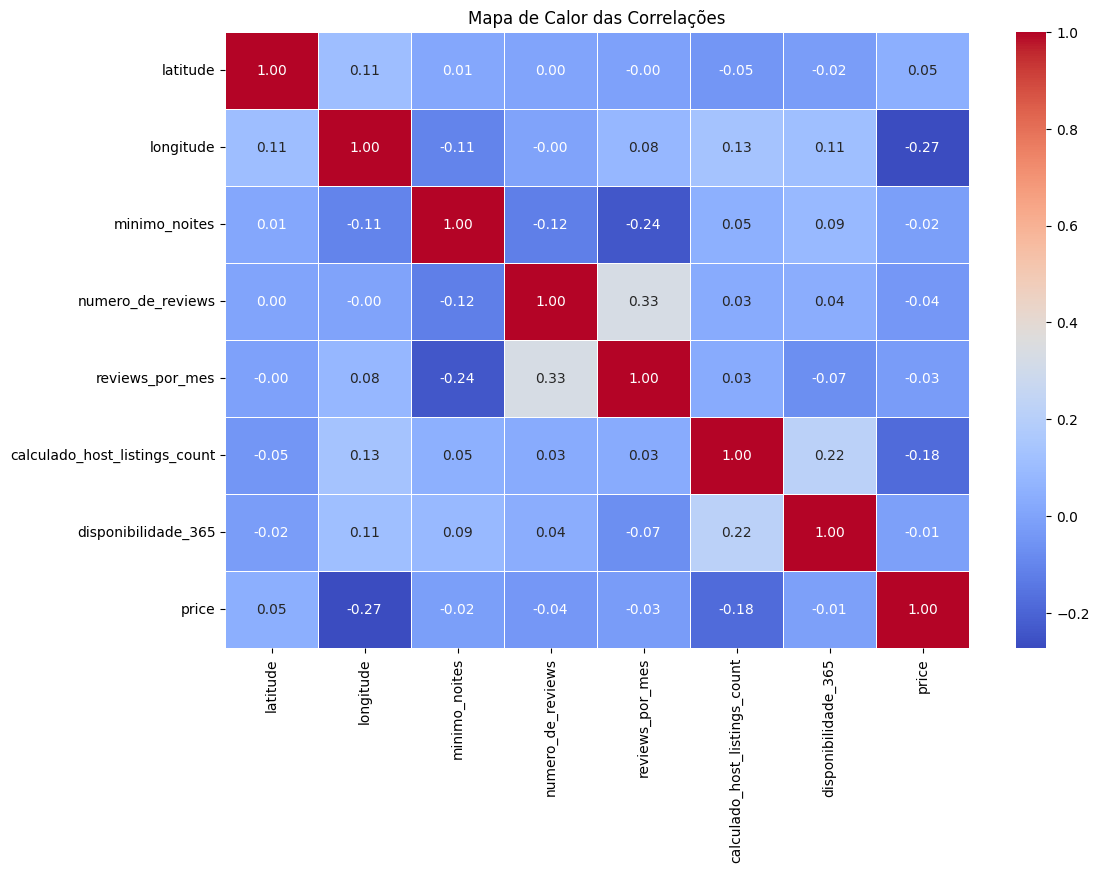

In [10]:
df_encoded = df_filtrado[numerical_cols + ['price']].copy()
plt.figure(figsize=(12, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de Calor das Correlações")
plt.show()


In [11]:
# Criar transformações para pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

In [12]:

# Criar pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [13]:
# Separar variáveis independentes e dependente
X = df_filtrado.drop(columns=['price'])
y = df_filtrado['price']


In [14]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Validação Cruzada - MAE médio: {-cv_scores.mean()}')

Validação Cruzada - MAE médio: 38.553960009406545


In [16]:
# Treinar pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['latitude', 'longitude',
                                                   'minimo_noites',
                                                   'numero_de_reviews',
                                                   'reviews_por_mes',
                                                   'calculado_host_listings_count',
                                                   'disponibilidade_365']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['room_type', 'bairro_group',
                                                   'bairro'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [17]:
# Fazer previsões
y_pred = pipeline.predict(X_test)

In [18]:
# Avaliar modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')


MAE: 35.59163960024984
MSE: 2453.2303989225484
RMSE: 49.53009589050427
R²: 0.5536471489887907


In [19]:
# Comparação com baseline
y_baseline = y_train.mean()
baseline_mae = mean_absolute_error(y_test, [y_baseline] * len(y_test))
print(f'Baseline MAE: {baseline_mae}')


Baseline MAE: 60.32791883040922


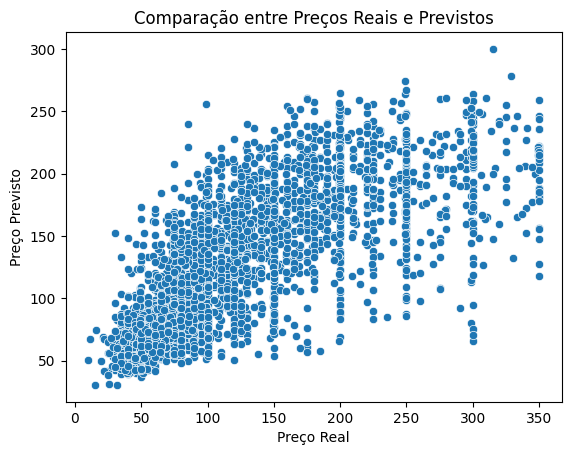

In [20]:
# Análise de erros
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Comparação entre Preços Reais e Previstos")
plt.show()


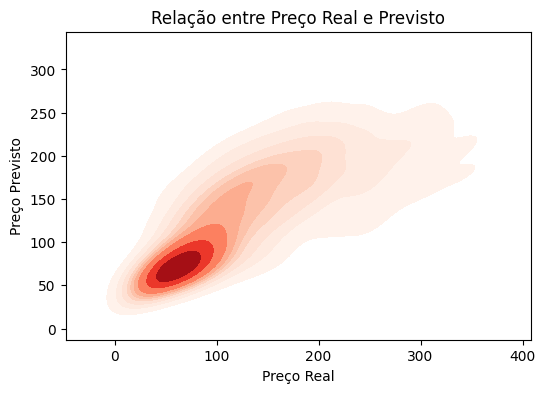

In [21]:
plt.figure(figsize=(6, 4))
sns.kdeplot(x=y_test, y=y_pred, cmap="Reds", fill=True)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title(f"Relação entre Preço Real e Previsto")
plt.show()

In [22]:
def prever_preco(novo_apartamento):
    df_novo = pd.DataFrame([novo_apartamento])
    df_novo = df_novo.drop(['id', 'host_id', 'nome', 'host_name', 'ultima_review'], axis=1)
    df_novo = df_novo[X_train.columns]
    preco_previsto = pipeline.predict(df_novo)
    return preco_previsto[0]

In [23]:
novo_apartamento = {'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}


In [24]:
#Preço real = 125
apartamento_teste={'id': 182177,
 'nome': 'A PRIVATE FLAT / APARTMENT- $SPECIAL$',
 'host_id': 873273,
 'host_name': 'Christian & Carla',
 'bairro_group': 'Bronx',
 'bairro': 'Allerton',
 'latitude': 40.86466,
 'longitude': -73.85709,
 'room_type': 'Entire home/apt',
 'minimo_noites': 2,
 'numero_de_reviews': 271,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 2.84,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 347
}

In [25]:
#preço real = 1750
apartamento_outlier={'id': 31120563,
 'nome': 'Magnificent 5 Bedroom Brooklyn Townhouse',
 'host_id': 9786357,
 'host_name': 'Ilsa',
 'bairro_group': 'Brooklyn',
 'bairro': 'Prospect Heights',
 'latitude': 40.68187,
 'longitude': -73.97075,
 'room_type': 'Entire home/apt',
 'minimo_noites': 2,
 'numero_de_reviews': 5,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 1.65,
 'calculado_host_listings_count': 1,
 'disponibilidade_365': 113}


In [26]:
preco_sugerido = prever_preco(novo_apartamento)
print(f'Preço sugerido: {preco_sugerido}')


Preço sugerido: 229.02


In [27]:
#Preço real = 125
preco_sugerido = prever_preco(apartamento_teste)
print(f'Preço sugerido: {preco_sugerido}')
erro= round(preco_sugerido-125,2)
erroporcentagem=round(erro/125*100,2)
print(f'Erro: {erro}')
print(f'Erro percentual: {erroporcentagem}%')

Preço sugerido: 148.06
Erro: 23.06
Erro percentual: 18.45%


In [28]:
#preço real = 1750
preco_sugerido = prever_preco(apartamento_outlier)
print(f'Preço sugerido: {preco_sugerido}')
erro= round(preco_sugerido-1750,2)
erroporcentagem=round(erro/1750*100,2)
print(f'Erro: {erro}')
print(f'Erro percentual: {erroporcentagem}%')

Preço sugerido: 176.88
Erro: -1573.12
Erro percentual: -89.89%
